In [121]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#  Import the Following Libraries
df = pd.read_csv('insurance3r2.csv')
df

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,4008,3,0,1,10600.54830,0
1334,18,0,31.920,3003,0,0,0,2205.98080,1
1335,18,0,36.850,3008,0,0,2,1629.83350,1
1336,21,0,25.800,8009,0,0,3,2007.94500,0


In [3]:
# 4 
# Check for Data Types
df.dtypes

age                 int64
sex                 int64
bmi               float64
steps               int64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [4]:
# Data Dimensions
df.shape

(1338, 9)

In [5]:
# Change the Incorrect Data Types if it’s necessary
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] =  df['region'].astype('category')
print(df.dtypes)

age                  int64
sex               category
bmi                float64
steps                int64
children             int64
smoker            category
region            category
charges            float64
insuranceclaim       int64
dtype: object


In [6]:
# Sanity check for the Incorrect Data Types
numeric_columns = ['age','bmi','steps','children','smoker','charges','insuranceclaim']
for col in numeric_columns:
    non_numeric = df[col].apply(lambda x:isinstance(x,(int,float))).value_counts().get(False,0)
    print(f'Non-numeric values in {col}:{non_numeric}')

Non-numeric values in age:0
Non-numeric values in bmi:0
Non-numeric values in steps:0
Non-numeric values in children:0
Non-numeric values in smoker:0
Non-numeric values in charges:0
Non-numeric values in insuranceclaim:0


In [7]:
# Summary Statistics for (both Numerical and Categorical Columns)
df.describe()

,age,bmi,steps,children,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,5328.623318,1.094918,13270.422265,0.585202
std,14.049960,6.098187,2453.643236,1.205493,12110.011237,0.492871
min,18.000000,15.960000,3000.000000,0.000000,1121.873900,0.000000
25%,27.000000,26.296250,3008.000000,0.000000,4740.287150,0.000000
50%,39.000000,30.400000,4007.000000,1.000000,9382.033000,1.000000
75%,51.000000,34.693750,8004.000000,2.000000,16639.912515,1.000000
max,64.000000,53.130000,10010.000000,5.000000,63770.428010,1.000000


In [8]:
numerical_summary = df.describe()
categorical_summary = {'sex': df['sex'].value_counts(),
                      'smoker':df['smoker'].value_counts(),
                      'region':df['region'].value_counts()}
print('Numerical Summary Statistics:')
print(numerical_summary)

print('Categorical Summary Statistics:')
print(categorical_summary)

Numerical Summary Statistics:
               age          bmi         steps     children       charges  \
count  1338.000000  1338.000000   1338.000000  1338.000000   1338.000000   
mean     39.207025    30.663397   5328.623318     1.094918  13270.422265   
std      14.049960     6.098187   2453.643236     1.205493  12110.011237   
min      18.000000    15.960000   3000.000000     0.000000   1121.873900   
25%      27.000000    26.296250   3008.000000     0.000000   4740.287150   
50%      39.000000    30.400000   4007.000000     1.000000   9382.033000   
75%      51.000000    34.693750   8004.000000     2.000000  16639.912515   
max      64.000000    53.130000  10010.000000     5.000000  63770.428010   

       insuranceclaim  
count     1338.000000  
mean         0.585202  
std          0.492871  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
Categorical Summary Statistics:
{'sex': sex
1    676
0    662
Name: c

In [9]:
# Missing Value Treatment (showcase in Coding and Visualization – Choose Appropriate plotting) 
df.isnull().sum()

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

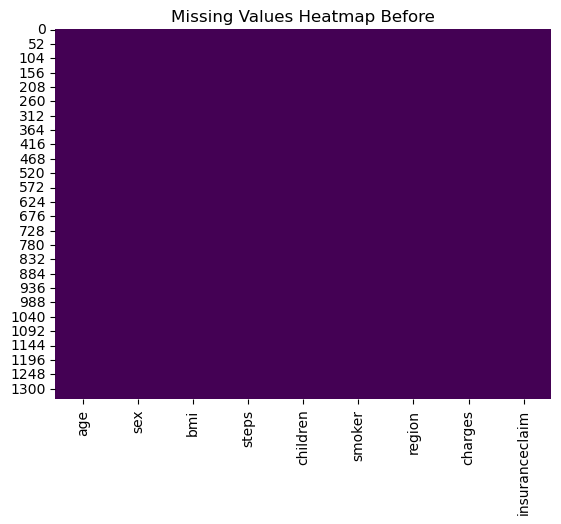

In [10]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title('Missing Values Heatmap Before')
plt.show()

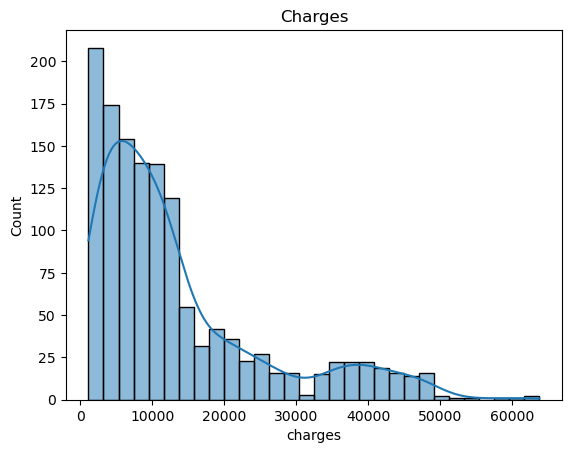

In [11]:
sns.histplot(df['charges'],kde=True)
plt.title('Charges')
plt.show()

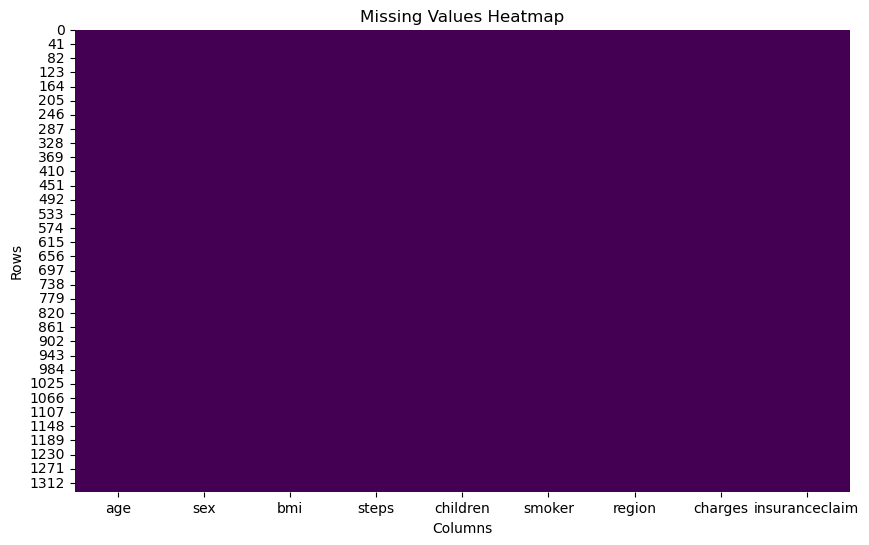

In [12]:
# Sanity Check for Missing Values (Showcase in Coding and Visualization – Choose Appropriate Plotting)
plt.figure(figsize =(10,6))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [13]:
miss_percentage = df.isnull().mean()*100
print(miss_percentage[miss_percentage>0])

Series([], dtype: float64)


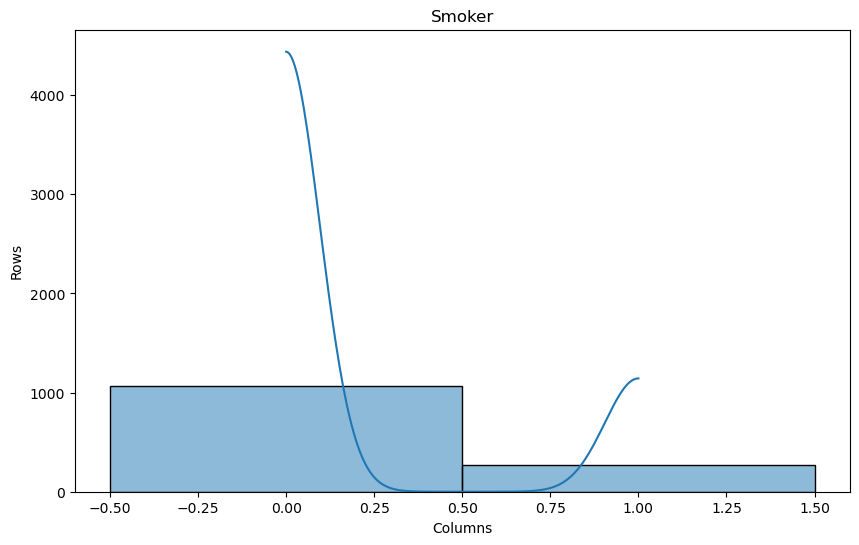

In [14]:
plt.figure(figsize =(10,6))
sns.histplot(df['smoker'],kde = True)
plt.title('Smoker')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [15]:
# IF missing Values are exists, Deal with Appropriate Treatment.
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])



Series([], dtype: int64)


In [16]:
df=df.dropna()

In [17]:
df['bmi'].fillna(df['bmi'].mean(),inplace = True)
df['sex'].fillna(df['sex'].mode()[0],inplace = True)

In [18]:
sc= StandardScaler()
neighbors = KNeighborsClassifier (n_neighbors = 5)
df_neighbors= sc.fit_transform(df)
df = pd.DataFrame(df_neighbors,columns=df.columns)

In [19]:
# Calculate Pearson’s Correlation for Both Categorical and Continuous Data.
df['sex'] = df['sex'].astype(int)
df['smoker'] = df['smoker'].astype(int)
correlation_matrix = df.corr(method = 'pearson')
correlation_matrix

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,-0.167957,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,-0.039470,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,-0.681149,0.012759,0.003750,0.157566,0.198341,0.384198
steps,-0.167957,-0.039470,-0.681149,1.000000,0.055346,-0.267845,-0.076483,-0.305570,-0.419514
children,0.042469,0.017163,0.012759,0.055346,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,-0.267845,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,-0.076483,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,-0.305570,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.419514,-0.409526,0.333261,0.020891,0.309418,1.000000


In [20]:
df['sex'] = df['sex'].astype(int)
df['smoker'] = df['smoker'].astype(int)

In [21]:
df.dtypes

age               float64
sex                 int32
bmi               float64
steps             float64
children          float64
smoker              int32
region            float64
charges           float64
insuranceclaim    float64
dtype: object

In [125]:
# Set of Analysing Categorical Columns with Appropriate Plotting, with inferences
def plot_Categorical_distribution(column,title):
    plt.figure(figsize =(10,5))
    sns.countplot(x=column,df=df)
    plt.title('Categorical Columns')
    plt.xlabel('column')
    plt.ylabel('Count')
    plt.show()

In [23]:
# Analyse the Relationship B/w Target and Categorical Variables.
sex = pd.crosstab(df['sex'],df['insuranceclaim'])
smoker = pd.crosstab(df['smoker'],df['insuranceclaim'])
region = pd.crosstab(df['region'],df['insuranceclaim'])
print('sex vs.insuranceclaim :')
print(sex)
print('smoker vs. insuranceclaim :')
print(smoker)
print('region vs. insuranceclaim')
print(region)

sex vs.insuranceclaim :
insuranceclaim  -1.187776   0.841910
sex                                 
-1                    285        377
 0                    270        406
smoker vs. insuranceclaim :
insuranceclaim  -1.187776   0.841910
smoker                              
0                     530        534
1                      25        249
region vs. insuranceclaim
insuranceclaim  -1.187776   0.841910
region                              
-1.372326             132        192
-0.466915             162        163
 0.438495             119        245
 1.343905             142        183


Text(0, 0.5, 'Count')

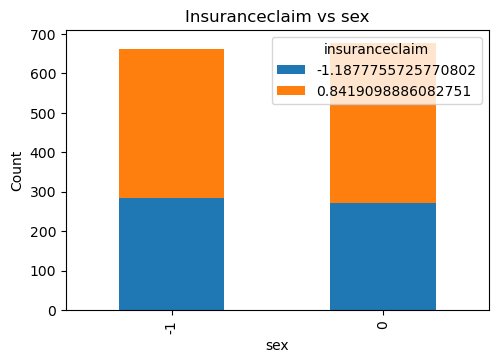

In [24]:
plt.figure(figsize =(12,8))
plt.subplot(2,2,1)
sex.plot(kind='bar',stacked =True, ax=plt.gca())
plt.title('Insuranceclaim vs sex')
plt.xlabel('sex')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

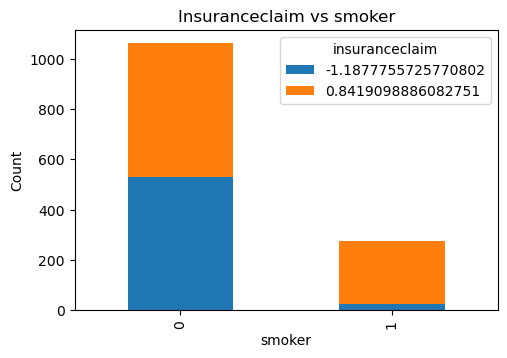

In [25]:
plt.figure(figsize =(12,8))
plt.subplot(2,2,1)
smoker.plot(kind='bar',stacked =True, ax=plt.gca())
plt.title('Insuranceclaim vs smoker')
plt.xlabel('smoker')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

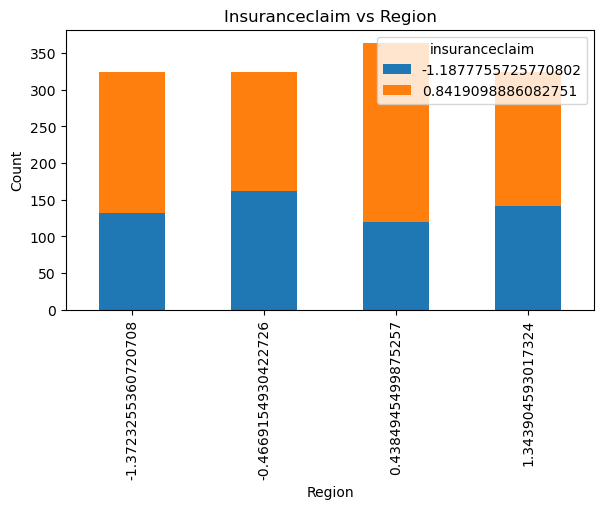

In [26]:
plt.figure(figsize =(15,8))
plt.subplot(2,2,1)
region.plot(kind='bar',stacked =True, ax=plt.gca())
plt.title('Insuranceclaim vs Region')
plt.xlabel('Region')
plt.ylabel('Count')

In [27]:
# 5 Feature with loaded Information about the Dataset, The insights should be meaningful.
x = df[['age','sex','bmi','steps','children','smoker']]
y = df['charges']

In [28]:
x = pd.get_dummies(x,drop_first = True)

In [29]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 0.2,random_state = 42)
x_train, x_test, y_train, y_test 

(           age  sex       bmi     steps  children  smoker
 560   0.483668   -1 -1.757474  1.091184  0.751079       0
 1285  0.554869   -1 -1.040599  1.092000 -0.908614       0
 1142  0.910875   -1 -0.952015 -0.130721 -0.908614       0
 969  -0.014740   -1  0.599846 -0.947771  3.240619       0
 486   1.053277   -1 -1.508126  1.089146  1.580926       0
 ...        ...  ...       ...       ...       ...     ...
 1095 -1.509965   -1  0.112633 -0.945325  2.410772       0
 1130 -0.014740   -1 -1.114419  1.904565  3.240619       0
 1294  1.338082    0 -0.900341 -0.129906 -0.908614       0
 860  -0.157143   -1  2.778356 -0.538023  0.751079       1
 1126  1.124479    0 -0.125231 -0.132352 -0.908614       0
 
 [1070 rows x 6 columns],
            age  sex       bmi     steps  children  smoker
 764   0.412467   -1 -0.900341  1.092000  0.751079       0
 887  -0.228344   -1 -0.105546 -0.539246 -0.908614       0
 890   1.765289   -1 -0.619825 -0.131944 -0.908614       1
 1293  0.483668    0 -0.8068

In [30]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred = model.predict(x_test)

In [32]:
print(y_pred)
print(y_test)

[-3.38860059e-01 -6.21917415e-01  1.97758786e+00 -2.72067763e-01
  1.06882911e+00 -8.60318514e-02 -9.71971011e-01  3.36085598e-01
 -9.98559871e-01 -7.71773760e-02  1.13042185e+00 -4.96580866e-01
 -5.31453448e-01  2.26779554e+00  2.37256284e+00  2.05404629e+00
  2.75069878e-01  1.99239055e+00 -2.19842934e-01  1.45077724e+00
 -6.44633162e-01 -3.64760897e-01 -9.92132269e-01 -5.67100161e-01
 -7.11432059e-02 -1.64865859e-01  7.37625241e-02 -7.20612763e-01
 -2.32147343e-01 -1.08455694e+00 -2.13667563e-01 -7.58099389e-02
 -8.04036311e-01 -7.53501998e-01 -5.88193075e-01 -4.01149279e-03
 -8.48403668e-01 -2.05909457e-01  1.79678381e+00  1.67698665e+00
 -6.83541416e-01 -9.14494185e-01  4.39974383e-02 -2.57424086e-01
 -4.50210400e-01  3.73068045e-02 -8.00844411e-01 -6.75324680e-01
  1.86418685e+00 -3.79399308e-01  2.52263637e-01 -7.94072900e-01
 -6.77137252e-02 -9.63806641e-01 -5.22403220e-02 -1.70855216e-01
 -7.25448035e-01  1.52793556e+00  1.76315745e-03 -1.62370979e-01
  5.65758755e-02 -1.87959

In [33]:
# 6 Discover Outliers, and add up necessary extraction insights with proper treatment
df_num = df.select_dtypes(include = [np.number])
df_num

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,-1.438764,-1,-0.453320,-0.945733,-0.908614,1,1.343905,0.298584,0.841910
1,-1.509965,0,0.509621,-0.946140,-0.078767,0,0.438495,-0.953689,0.841910
2,-0.797954,0,0.383307,-0.945733,1.580926,0,0.438495,-0.728675,-1.187776
3,-0.441948,0,-1.305531,1.908235,-0.908614,0,-0.466915,0.719843,-1.187776
4,-0.513149,0,-0.292556,1.093223,-0.908614,0,-0.466915,-0.776802,0.841910
...,...,...,...,...,...,...,...,...,...
1333,0.768473,0,0.050297,-0.538431,1.580926,0,-0.466915,-0.220551,-1.187776
1334,-1.509965,-1,0.206139,-0.948179,-0.908614,0,-1.372326,-0.914002,0.841910
1335,-1.509965,-1,1.014878,-0.946140,-0.908614,0,0.438495,-0.961596,0.841910
1336,-1.296362,-1,-0.797813,1.092815,-0.908614,0,1.343905,-0.930362,-1.187776


In [34]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3-Q1
IQR

age               1.708829
sex               1.000000
bmi               1.377564
steps             2.036917
children          1.659693
smoker            0.000000
region            0.905410
charges           0.982995
insuranceclaim    2.029685
dtype: float64

In [83]:
# 9 Encoding for Categorical Data
df_encoded = pd.get_dummies(df,columns=['region','sex','smoker'],drop_first = True)
df_encoded

,age,bmi,steps,children,charges,insuranceclaim,region_-0.4669154930422726,region_0.4384945499875257,region_1.343904593017324,sex_0,smoker_1
0,-1.438764,-0.453320,-0.945733,-0.908614,0.298584,0.841910,False,False,True,False,True
1,-1.509965,0.509621,-0.946140,-0.078767,-0.953689,0.841910,False,True,False,True,False
2,-0.797954,0.383307,-0.945733,1.580926,-0.728675,-1.187776,False,True,False,True,False
3,-0.441948,-1.305531,1.908235,-0.908614,0.719843,-1.187776,True,False,False,True,False
4,-0.513149,-0.292556,1.093223,-0.908614,-0.776802,0.841910,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,-0.538431,1.580926,-0.220551,-1.187776,True,False,False,True,False
1334,-1.509965,0.206139,-0.948179,-0.908614,-0.914002,0.841910,False,False,False,False,False
1335,-1.509965,1.014878,-0.946140,-0.908614,-0.961596,0.841910,False,True,False,False,False
1336,-1.296362,-0.797813,1.092815,-0.908614,-0.930362,-1.187776,False,False,True,False,False


In [95]:
df.columns

Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [97]:
# 10 Scaling for Ensured Method
scaled_columns = ['age','bmi','steps','children','charges']
scaler = StandardScaler()
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])
df[scaled_columns] 

,age,bmi,steps,children,charges
0,-1.438764,-0.453320,-0.945733,-0.908614,0.298584
1,-1.509965,0.509621,-0.946140,-0.078767,-0.953689
2,-0.797954,0.383307,-0.945733,1.580926,-0.728675
3,-0.441948,-1.305531,1.908235,-0.908614,0.719843
4,-0.513149,-0.292556,1.093223,-0.908614,-0.776802
...,...,...,...,...,...
1333,0.768473,0.050297,-0.538431,1.580926,-0.220551
1334,-1.509965,0.206139,-0.948179,-0.908614,-0.914002
1335,-1.509965,1.014878,-0.946140,-0.908614,-0.961596
1336,-1.296362,-0.797813,1.092815,-0.908614,-0.930362


In [115]:
# 11 Split the Dataset for further analysis
x = df.drop(columns =['charges','insuranceclaim'])
y = df['charges']


In [117]:
x_train, x_test, y_train, y_test  = train_test_split (x,y, test_size =0.2,random_state = 42)
x_train, x_test, y_train, y_test 

(           age  sex       bmi     steps  children  smoker    region
 560   0.483668   -1 -1.757474  1.091184  0.751079       0 -0.466915
 1285  0.554869   -1 -1.040599  1.092000 -0.908614       0 -1.372326
 1142  0.910875   -1 -0.952015 -0.130721 -0.908614       0  0.438495
 969  -0.014740   -1  0.599846 -0.947771  3.240619       0  0.438495
 486   1.053277   -1 -1.508126  1.089146  1.580926       0 -0.466915
 ...        ...  ...       ...       ...       ...     ...       ...
 1095 -1.509965   -1  0.112633 -0.945325  2.410772       0 -1.372326
 1130 -0.014740   -1 -1.114419  1.904565  3.240619       0  0.438495
 1294  1.338082    0 -0.900341 -0.129906 -0.908614       0 -1.372326
 860  -0.157143   -1  2.778356 -0.538023  0.751079       1  1.343905
 1126  1.124479    0 -0.125231 -0.132352 -0.908614       0  1.343905
 
 [1070 rows x 7 columns],
            age  sex       bmi     steps  children  smoker    region
 764   0.412467   -1 -0.900341  1.092000  0.751079       0 -1.372326
 887  

In [107]:
display(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1070, 7)

(268, 7)

(1070,)

(268,)

In [119]:
# 12. Impute the Linear Regression Analysis (OLS Summary)
x = df['charges']
y = df['charges']

In [123]:
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.925e+34
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:29:45   Log-Likelihood:                 46379.
No. Observations:                1338   AIC:                        -9.275e+04
Df Residuals:                    1336   BIC:                        -9.274e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.214e-17   5.85e-18      2.077      0.038    6.74e-19    2.36e-17
charges        1.0000   5.85e-18   1.71e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                      300.824   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              550.974
Skew:                           1.381   Prob(JB):                    2.28e-120
Kurtosis:                       4.500   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""